In [42]:
using Pkg; Pkg.activate(".")
using SteinMD
using Molly 
using PotentialLearning
using LinearAlgebra
using SpecialPolynomials

# plotting scripts - these are kept separate from the package for now
include("/Users/swyant/cesmix/dev/SteinMD.jl/src/makie/makie.jl")

  Activating project at `~/cesmix/exploratory/new_public/molly/steinmd_expts`


plot_trigger_hist (generic function with 1 method)

In [43]:
ref = MullerBrown()

MullerBrown{SVector{4, Quantity{Float64, 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}}, SVector{4, Quantity{Float64, 𝐋⁻², Unitful.FreeUnits{(nm⁻²,), 𝐋⁻², nothing}}}, SVector{4, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}, Unitful.FreeUnits{(kJ, nm⁻¹, mol⁻¹), 𝐋 𝐌 𝐍⁻¹ 𝐓⁻², nothing}, Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}(Quantity{Float64, 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}[-200.0 kJ mol⁻¹, -100.0 kJ mol⁻¹, -170.0 kJ mol⁻¹, 15.0 kJ mol⁻¹], Quantity{Float64, 𝐋⁻², Unitful.FreeUnits{(nm⁻²,), 𝐋⁻², nothing}}[-1.0 nm⁻², -1.0 nm⁻², -6.5 nm⁻², 0.7 nm⁻²], Quantity{Float64, 𝐋⁻², Unitful.FreeUnits{(nm⁻²,), 𝐋⁻², nothing}}[0.0 nm⁻², 0.0 nm⁻², 11.0 nm⁻², 0.6 nm⁻²], Quantity{Float64, 𝐋⁻², Unitful.FreeUnits{(nm⁻²,), 𝐋⁻², nothing}}[-10.0 nm⁻², -10.0 nm⁻², -6.5 nm⁻², 0.7 nm⁻²], Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[1.0 nm, 0.0 nm, -0.5 nm, -1.0 nm], Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋,

In [44]:
pce = PolynomialChaos(4, 2, ChebyshevU)

PolynomialChaos{Type{ChebyshevU}, Unitful.FreeUnits{(kJ, nm⁻¹, mol⁻¹), 𝐋 𝐌 𝐍⁻¹ 𝐓⁻², nothing}, Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}(4, 2, nothing, ChebyshevU, Vector[ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₄(x)), ChebyshevU(1.0⋅U₀(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₃(x)), ChebyshevU(1.0⋅U₀(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₃(x)), ChebyshevU(1.0⋅U₁(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₂(x)), ChebyshevU(1.0⋅U₀(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₂(x)), ChebyshevU(1.0⋅U₁(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₂(x)), ChebyshevU(1.0⋅U₂(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₁(x)), ChebyshevU(1.0⋅U₀(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₁(x)), ChebyshevU(1.0⋅U₁(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₁(x)), ChebyshevU(1.0⋅U₂(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₁(x)), ChebyshevU(1.0⋅U₃(x))], ChebyshevU{Float64, :x}[ChebyshevU(1.0⋅U₀(x)), ChebyshevU(1.0⋅U₀(x))], ChebyshevU{Float64, :x}[ChebyshevU(1

In [45]:
# define properties
atom_mass = 1.0u"g/mol"
boundary = RectangularBoundary(Inf*u"nm")
temp = 100.0u"K"

# define initial system
atoms = [Atom(mass=atom_mass)]
coords = [SVector(-0.8, 1.2)u"nm"] # initial position
sys = System(
    atoms=atoms,
    coords=coords,
    boundary=boundary,
    general_inters=(ref,),
    loggers=(coords=CoordinateLogger(100; dims=2),),
)

# define simulator
sim_langevin = OverdampedLangevin(
            dt=0.002u"ps",
            temperature=temp,
            friction=4.0u"ps^-1")

OverdampedLangevin{Quantity{Float64, 𝐓, Unitful.FreeUnits{(ps,), 𝐓, nothing}}, Quantity{Float64, 𝚯, Unitful.FreeUnits{(K,), 𝚯, nothing}}, Quantity{Float64, 𝐓⁻¹, Unitful.FreeUnits{(ps⁻¹,), 𝐓⁻¹, nothing}}}(0.002 ps, 100.0 K, 4.0 ps⁻¹, 1)

In [46]:
# run simulation - this will take a few seconds
simulate!(sys, sim_langevin, 5_000_000)

System with 1 atoms, boundary RectangularBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}(Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}[Inf nm, Inf nm])

In [47]:
# subsample to obtain training data
coords_train = [sys.loggers.coords.history[i][1] for i = 2:2000:length(sys.loggers.coords.history)]
ntrain = length(coords_train)
atoms_train = [Atom(mass=atom_mass) for i in 1:ntrain]

sys_train = [System(
    atoms=[atoms_i],
    coords=[coords_i],
    boundary=boundary,
    general_inters=(ref,),
    # k = 1.0u"kJ * K^-1 * mol^-1",
) for (atoms_i, coords_i) in zip(atoms_train, coords_train)]

25-element Vector{System{2, false, Float64, Vector{Atom{Float64, Quantity{Float64, 𝐌 𝐍⁻¹, Unitful.FreeUnits{(g, mol⁻¹), 𝐌 𝐍⁻¹, nothing}}, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}, Quantity{Float64, 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}}}, Vector{SVector{2, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}}, RectangularBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}, Vector{SVector{2, Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(nm, ps⁻¹), 𝐋 𝐓⁻¹, nothing}}}}, Vector{Any}, Nothing, Tuple{}, Tuple{}, Tuple{MullerBrown{SVector{4, Quantity{Float64, 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}}, SVector{4, Quantity{Float64, 𝐋⁻², Unitful.FreeUnits{(nm⁻²,), 𝐋⁻², nothing}}}, SVector{4, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}, Unitful.FreeUnits{(kJ, nm⁻¹, mol⁻¹), 𝐋 𝐌 𝐍⁻¹ 𝐓⁻², nothing}, Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}}, Tuple{}, NoNeighborFinder, Tuple{

In [ ]:
# ALT: subsample to obtain training data
x_train = [[-0.85, 1.23], [-0.92, 1.1], [-0.78, 1.46], [-0.82, 1.57], [-0.6, 1.27],
           [-0.51, 1.09], [-0.98, 1.72], [-0.54, 1.68], [-0.49, 1.26], [-0.80, 1.12]]
coords_train = [SVector(x[1], x[2])u"nm" for x in x_train]
ntrain = length(x_train)
atoms_train = [Atom(mass=atom_mass) for i in 1:ntrain]

# define initial ensemble
sys_train = [System(
    atoms=[atoms_i],
    coords=[coords_i],
    boundary=boundary,
    general_inters=(ref,),
    # k = 1.0u"kJ * K^-1 * mol^-1",
    loggers=(
        coords=CoordinateLogger(1; dims=2),
        ksd=StepComponentLogger(1; dims=2),
    )
) for (atoms_i, coords_i) in zip(atoms_train, coords_train)]

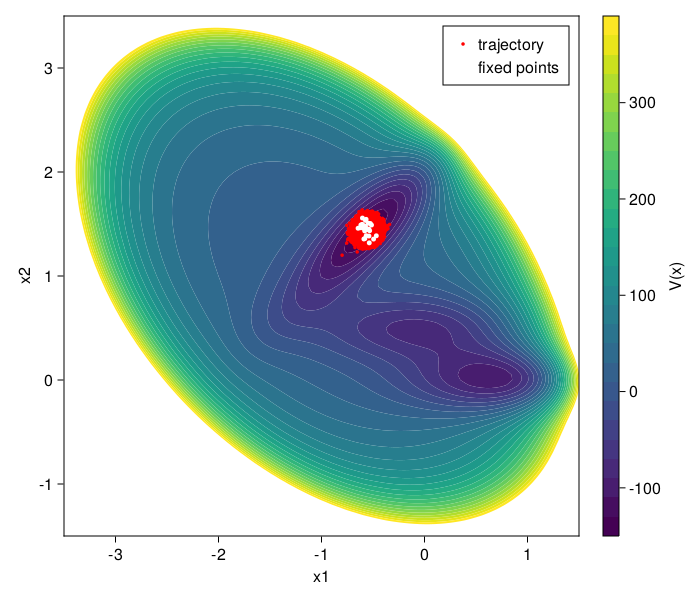

In [48]:

# plot training samples
dist_units = u"nm"
xcoords = Vector(-3.5:0.05:1.5) .* dist_units
ycoords = Vector(-1.5:0.05:3.5) .* dist_units
ctr_grid = [xcoords, ycoords]
ctr_lvls = -150:20:400

f0 = plot_md_trajectory(sys, sys_train, ctr_grid, fill=true, lvls=ctr_lvls)

In [49]:
train_potential!(sys_train,ref,pce)
pce.params

15-element Vector{Float64}:
  63.82534231932668
  28.818723775395835
 -18.760460842117343
 -39.16959372923872
 -63.270863010255496
  15.696257893192094
 -19.796823408068892
 -15.700203964731452
  23.548256207050898
 -20.113459088766163
  45.816448686894404
  68.31419601728916
  30.312313955089582
 -83.76796269072862
  16.562827654466748

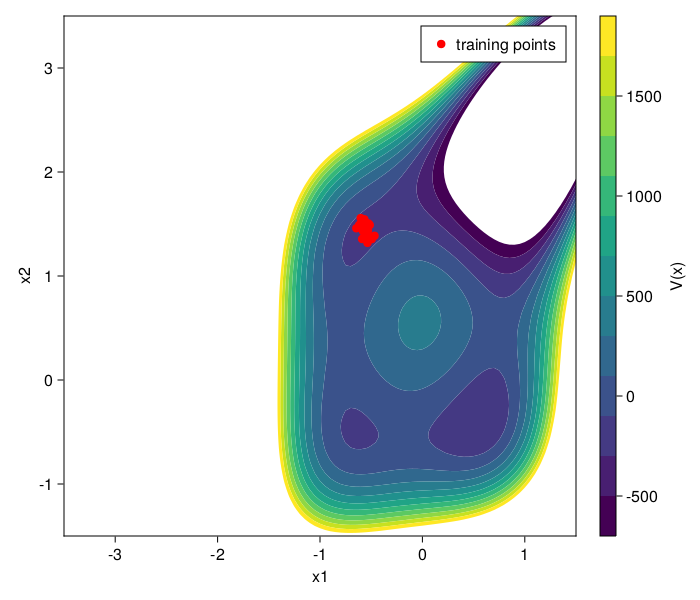

In [50]:
ctr_lvls2 = -700:200:2000
f0, ax0 = plot_contours_2D(pce,xcoords,ycoords; fill=true, lvls=ctr_lvls2)
coordmat = transpose(reduce(hcat, get_values(coords_train)))
scatter!(ax0, coordmat[:,1], coordmat[:,2], color=:red, label="training points")
axislegend(ax0)
f0

In [51]:
rbf = RBF(Euclidean(2), β=1.0, ℓ = 0.1)
# define simulator
sim_svgd = StochasticSVGD(
            dt=0.001u"ps",
            kernel=rbf,
            temperature=temp, #1.0u"K",
            friction=4.0u"ps^-1")
     

StochasticSVGD{Quantity{Float64, 𝐓, Unitful.FreeUnits{(ps,), 𝐓, nothing}}, RBF, Quantity{Float64, 𝚯, Unitful.FreeUnits{(K,), 𝚯, nothing}}, Quantity{Float64, 𝐓⁻¹, Unitful.FreeUnits{(ps⁻¹,), 𝐓⁻¹, nothing}}}(0.001 ps, RBF(Euclidean{Float64}([1.0 0.0; 0.0 1.0], [1.0 0.0; 0.0 1.0]), 1.0e-8, 0.1, 1.0), 100.0 K, 4.0 ps⁻¹, 1)

In [52]:
altrigger = TimeInterval(interval=200)

TimeInterval(200)

In [53]:
# define initial ensemble
ens0 = [System(
    atoms=[atoms_i],
    coords=[coords_i],
    boundary=boundary,
    general_inters=(pce,),
    # k = 1.0u"kJ * K^-1 * mol^-1",
    loggers=(
        coords=CoordinateLogger(1; dims=2),
        ksd=StepComponentLogger(1; dims=2),
        # trigger=TriggerLogger(altrigger, 1),
        params=TrainingLogger(),
    )
) for (atoms_i, coords_i) in zip(atoms_train, coords_train)]

25-element Vector{System{2, false, Float64, Vector{Atom{Float64, Quantity{Float64, 𝐌 𝐍⁻¹, Unitful.FreeUnits{(g, mol⁻¹), 𝐌 𝐍⁻¹, nothing}}, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}, Quantity{Float64, 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}}}, Vector{SVector{2, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}}, RectangularBoundary{Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}, Vector{SVector{2, Quantity{Float64, 𝐋 𝐓⁻¹, Unitful.FreeUnits{(nm, ps⁻¹), 𝐋 𝐓⁻¹, nothing}}}}, Vector{Any}, Nothing, Tuple{}, Tuple{}, Tuple{PolynomialChaos{Type{ChebyshevU}, Unitful.FreeUnits{(kJ, nm⁻¹, mol⁻¹), 𝐋 𝐌 𝐍⁻¹ 𝐓⁻², nothing}, Unitful.FreeUnits{(kJ, mol⁻¹), 𝐋² 𝐌 𝐍⁻¹ 𝐓⁻², nothing}}}, Tuple{}, NoNeighborFinder, NamedTuple{(:coords, :ksd, :params), Tuple{GeneralObservableLogger{Vector{SVector{2, Quantity{Float64, 𝐋, Unitful.FreeUnits{(nm,), 𝐋, nothing}}}}, typeof(Molly.coordinates_wrapper)}, StepComponentLogger{Vector{SVector{2, Quantity{Floa

In [55]:
ens = deepcopy(ens0) # I guess so that you constantly have access to the initialized ensemble
sys_final, alsteps = active_learn!(ens, sim_svgd, 2_000, sys_train, ref, altrigger)

ArgumentError: ArgumentError: invalid argument #4 to LAPACK call